<h1 align="center"><font size='6'>  DATA Analysis </h1>
<br>


In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go 
import plotly.express as px
py.init_notebook_mode(connected=True)

In [2]:
# load data
data = pd.read_csv(f'C:/Users/james/Desktop/Wecloud_Data_Bootcamp/ontario_cars.csv')

In [3]:
data.shape

(23978, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23978 entries, 0 to 23977
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             23978 non-null  int64  
 1   brand            23978 non-null  object 
 2   model            23978 non-null  object 
 3   location         23978 non-null  object 
 4   price            23978 non-null  int64  
 5   mileage          23978 non-null  int64  
 6   body_type        23978 non-null  object 
 7   exterior_colour  23978 non-null  object 
 8   interior_colour  23978 non-null  object 
 9   door             23978 non-null  object 
 10  passenger        23978 non-null  object 
 11  transmission     23978 non-null  object 
 12  drive_type       23978 non-null  object 
 13  displacement     23978 non-null  object 
 14  cylinder         23978 non-null  object 
 15  fuel             23978 non-null  object 
 16  country          23978 non-null  object 
 17  real_year   

In [6]:
data.head(2)

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel,country,real_year
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,-,-,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,3.75
1,2017,Dodge,Grand,Dodge,17885,57100,-,-,-,-,-,Automatic,-,-,-,-,USA,3.88


<h1 align="center"><font size='6'>  Retention Rate </h1>
<br>

<h1 align="center"><font size='3'>  Check the Retention rate of different Brand, Body Type, Model with in 5 years </h1>
<br>


In [7]:
data['car_age_int']=data['real_year'].round(0).astype(int)
data['car_age_str']=data['car_age_int'].astype(str)


In [8]:
data

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel,country,real_year,car_age_int,car_age_str
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,-,-,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,3.75,4,4
1,2017,Dodge,Grand,Dodge,17885,57100,-,-,-,-,-,Automatic,-,-,-,-,USA,3.88,4,4
2,2017,Toyota,Camry,Toyota,22888,95532,Sedan,White,Gray,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,5.48,5,5
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,4.01,4,4
4,2009,Dodge,Grand,Dodge,5395,179686,-,-,Gray,5,7,Automatic,FWD,-,-,Gasoline,USA,12.99,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23973,2008,Ford,Ranger,Windsor,6999,126182,Truck,Gray,Gray,4,4,Manual,RWD,4.0,6,Gasoline,USA,11.26,11,11
23974,2006,Honda,Civic,Honda,3499,250000,Sedan,Silver,Black,4,4,Manual,FWD,1.8,4,Gasoline,Japan,17.42,17,17
23975,2004,Audi,A4,Windsor,4299,217000,Sedan,Silver,Black,4,4,Automatic,AWD,1.8,4,Gasoline,Germany,17.04,17,17
23976,2007,Chevrolet,Cobalt,Windsor,3999,106402,Sedan,White,Silver,4,4,Automatic,FWD,2.2,4,Gasoline,USA,10.93,11,11


In [9]:
# filter data with in 5 years
data_age_less5=data[data['car_age_int']<=5]

In [10]:
data_age_less5.shape

(13230, 20)

<h1 align="center"><font size='4'>  BRAND RETETION </h1>
<br>

In [11]:
# 1. TOP 5 best and worst 5-years-retention-rate

brand_retention5=data_age_less5.groupby(['brand','car_age_str'])['price'].mean().unstack()

In [12]:
brand_retention5

car_age_str,0,1,2,3,4,5
brand,,,,,,
Acura,46995.000000,38609.909091,33724.388889,26147.400000,23664.918919,22355.388060
Audi,55753.352941,57774.163636,52329.685185,37130.606061,31008.948052,28696.069767
BMW,60989.496350,56345.115942,45482.652174,37225.490909,33775.284314,30787.266667
Buick,36912.916667,29596.333333,25565.195122,23500.142857,19703.777778,19321.825000
Cadillac,69697.789474,57612.750000,38111.488889,32755.625000,33814.119048,26693.388889
Chevrolet,46427.966667,34526.886525,27483.912442,20696.783505,19950.315068,19349.552764
Chrysler,41747.000000,32059.454545,31323.377358,29099.384615,22132.535714,17277.882353
Dodge,55610.500000,37037.188889,30525.420000,24478.084746,21083.000000,20971.556701
Ford,49946.300000,35681.005291,33367.587121,26984.555970,24782.478417,21658.846154


In [13]:
brand_retention5['ratention_rate']=brand_retention5['5']/brand_retention5['0']

In [14]:
brand_retention5.sort_values(by='ratention_rate')

car_age_str,0,1,2,3,4,5,ratention_rate
brand,,,,,,,
Dodge,55610.500000,37037.188889,30525.420000,24478.084746,21083.000000,20971.556701,0.377115
Cadillac,69697.789474,57612.750000,38111.488889,32755.625000,33814.119048,26693.388889,0.382988
Volkswagen,39680.500000,30756.168421,22625.696970,22828.157895,18688.181818,15871.757962,0.399989
Chrysler,41747.000000,32059.454545,31323.377358,29099.384615,22132.535714,17277.882353,0.413871
Chevrolet,46427.966667,34526.886525,27483.912442,20696.783505,19950.315068,19349.552764,0.416765
Mitsubishi,35938.500000,24212.972222,21956.507042,19633.684211,17679.840000,15021.560000,0.417980
Lincoln,55315.333333,59421.400000,35908.285714,33771.187500,28493.960000,23200.733333,0.419427
Ford,49946.300000,35681.005291,33367.587121,26984.555970,24782.478417,21658.846154,0.433643
Volvo,69998.000000,59623.000000,48284.000000,38705.166667,37282.307692,30725.333333,0.438946


In [15]:
retentionrate_TOP5=brand_retention5.sort_values(by='ratention_rate',ascending=False).head(5)
retentionrate_TOP5

car_age_str,0,1,2,3,4,5,ratention_rate
brand,,,,,,,
Hyundai,24582.000000,23738.060345,21090.781915,18394.780612,17303.300000,16396.263158,0.667003
Lexus,52797.000000,62265.714286,48621.000000,39211.680851,37442.690909,34244.974359,0.648616
Toyota,37081.084615,28735.327731,25475.805556,25872.266304,22679.992126,21092.197183,0.568813
Nissan,31624.650000,28002.530435,22277.291925,20344.336634,19197.620112,17709.788945,0.560000
Mercedes-Benz,54370.035714,58536.796296,57292.680000,51322.485714,38970.678261,30365.783784,0.558502


In [16]:
retentionrate_Worst5=brand_retention5.sort_values(by='ratention_rate',ascending=True).head(5)
retentionrate_Worst5

car_age_str,0,1,2,3,4,5,ratention_rate
brand,,,,,,,
Dodge,55610.500000,37037.188889,30525.420000,24478.084746,21083.000000,20971.556701,0.377115
Cadillac,69697.789474,57612.750000,38111.488889,32755.625000,33814.119048,26693.388889,0.382988
Volkswagen,39680.500000,30756.168421,22625.696970,22828.157895,18688.181818,15871.757962,0.399989
Chrysler,41747.000000,32059.454545,31323.377358,29099.384615,22132.535714,17277.882353,0.413871
Chevrolet,46427.966667,34526.886525,27483.912442,20696.783505,19950.315068,19349.552764,0.416765


In [17]:
# Best and Worst top five brand retention rate
retentionrate_TOP5['ratention_rate']=retentionrate_TOP5['ratention_rate'].round(2)
retentionrate_Worst5['ratention_rate']=retentionrate_Worst5['ratention_rate'].round(2)

In [18]:
plt.style.use('seaborn')

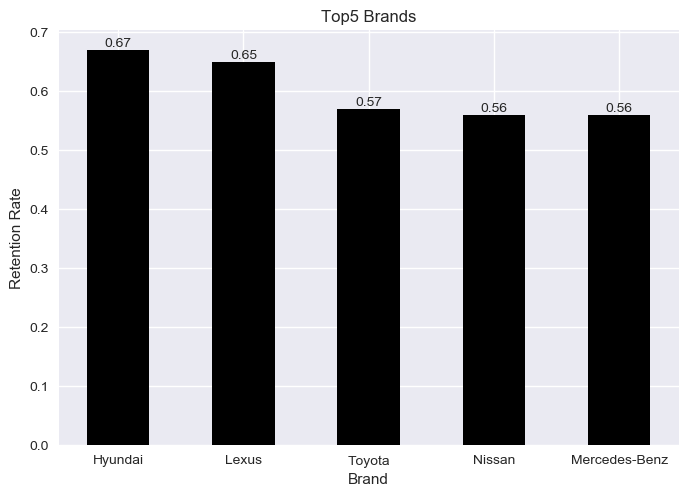

In [27]:
# plot TOP BEST 5: BRANDS SHOW
plt.figure(dpi=100)
x=retentionrate_TOP5.index
y=retentionrate_TOP5['ratention_rate']
plt.bar(x,y,width=0.5,color='#000000')
plt.title('Top5 Brands')
plt.xlabel('Brand')
plt.ylabel('Retention Rate')
for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')

plt.show()

In [21]:
# fig=go.Figure(go.Bar(x=retentionrate_TOP5.index,y=retentionrate_TOP5['ratention_rate'],width=0.3,text=y,textposition='outside'\
#                 ))
fig=px.bar(retentionrate_TOP5, x=retentionrate_TOP5.index,y=retentionrate_TOP5['ratention_rate'],text=y,\
          width=800,title='Top5 Brands with high Retention Rate')
# fig.update_layout(title_text='Top5 Brands with high Retention Rate')

# py.iplot([top5brand])
fig.show()

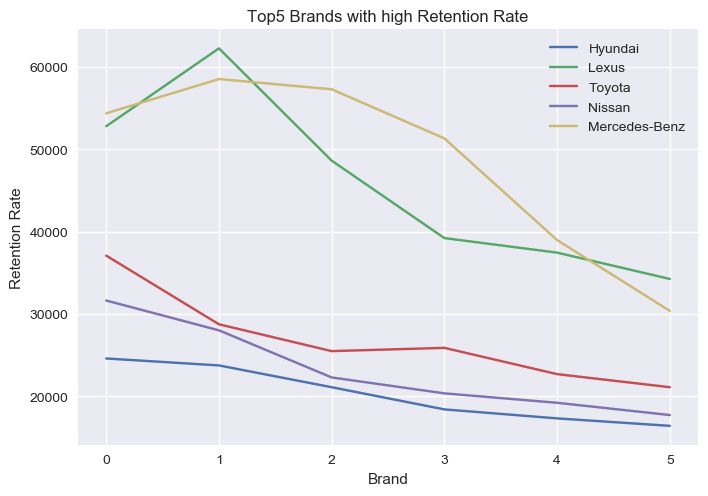

In [28]:
# plot TOP BEST 5: depreciation trend 
plt.figure(dpi=100)

Hyundai=retentionrate_TOP5.loc['Hyundai','0':'5']
Hyundai.plot(kind='line')

Lexus=retentionrate_TOP5.loc['Lexus','0':'5']
Lexus.plot(kind='line')

Toyota=retentionrate_TOP5.loc['Toyota','0':'5']
Toyota.plot(kind='line')

Nissan=retentionrate_TOP5.loc['Nissan','0':'5']
Nissan.plot(kind='line')

Mercedes_Benz=retentionrate_TOP5.loc['Mercedes-Benz','0':'5']
Mercedes_Benz.plot(kind='line')

plt.title('Top5 Brands with high Retention Rate')
plt.xlabel('Brand')
plt.ylabel('Retention Rate')

plt.legend()
plt.show()

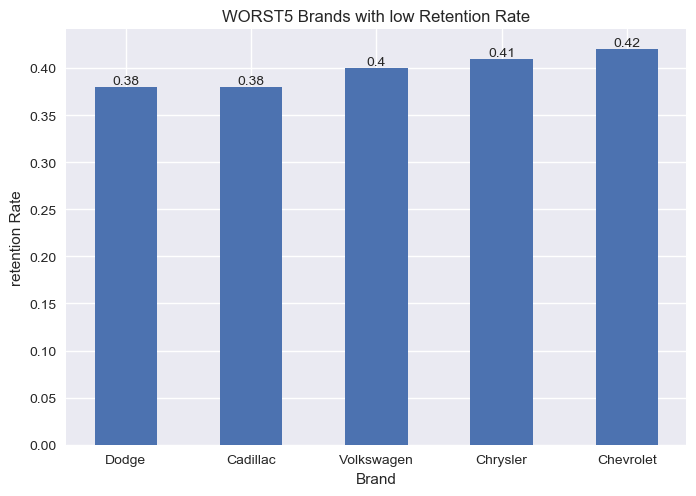

In [29]:
# plot TOP5 WORST:BRAND SHOW
retentionrate_Worst5
plt.figure(dpi=100)
x=retentionrate_Worst5.index
y=retentionrate_Worst5['ratention_rate']
plt.bar(x,y,width=0.5)
plt.title('WORST5 Brands with low Retention Rate')
plt.xlabel('Brand')
plt.ylabel('retention Rate')


for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')

plt.show()

In [30]:
# fig=go.Figure(go.Bar(x=retentionrate_TOP5.index,y=retentionrate_TOP5['ratention_rate'],width=0.3,text=y,textposition='outside'\
#                 ))
fig=px.bar(retentionrate_Worst5, x=retentionrate_Worst5.index,y=retentionrate_Worst5['ratention_rate'],text=y,\
          width=800,title='Top5 Brands with low Retention Rate')
# fig.update_layout(title_text='Top5 Brands with high Retention Rate')

# py.iplot([top5brand])
fig.show()

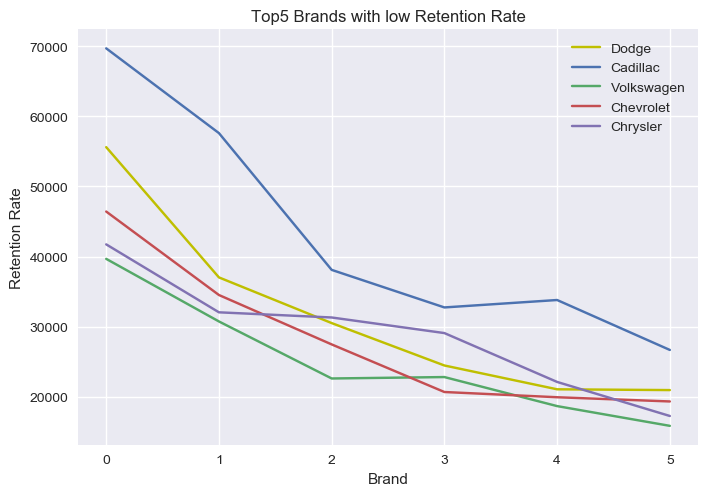

In [31]:
# plot TOP WORST 5: depreciation trend 
plt.figure(dpi=100)

Dodge=retentionrate_Worst5.loc['Dodge','0':'5']
plt.plot(Dodge,'y-',label='Dodge')

Cadillac=retentionrate_Worst5.loc['Cadillac','0':'5']
Cadillac.plot(kind='line')

Volkswagen=retentionrate_Worst5.loc['Volkswagen','0':'5']
Volkswagen.plot(kind='line')

Chevrolet=retentionrate_Worst5.loc['Chevrolet','0':'5']
Chevrolet.plot(kind='line')

Chrysler=retentionrate_Worst5.loc['Chrysler','0':'5']
Chrysler.plot(kind='line')

plt.title('Top5 Brands with low Retention Rate')
plt.xlabel('Brand')
plt.ylabel('Retention Rate')

plt.legend()
plt.show()

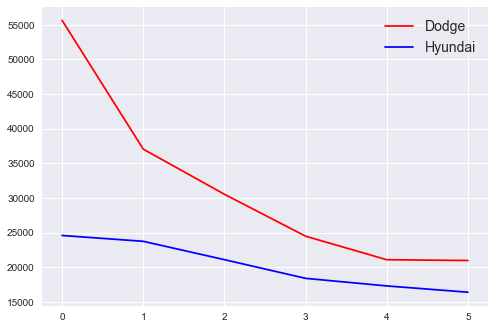

In [32]:
# TOP 1 VS BOTTOM 1 
Dodge=retentionrate_Worst5.loc['Dodge','0':'5']
plt.plot(Dodge,'r-',label='Dodge')

Hyundai=retentionrate_TOP5.loc['Hyundai','0':'5']
plt.plot(Hyundai,'b-',label='Hyundai')


plt.legend(fontsize=14)
plt.show()


<h1 align="center"><font size='4'> </h1>
<br>

<h1 align="center"><font size='4'></h1>
<br>

<h1 align="center"><font size='4'>  MODEL RETETION </h1>
<br>

In [271]:
model_retention5=data_age_less5.groupby(['model','car_age_str'])['price'].mean().unstack()

In [272]:
model_retention5

car_age_str,0,1,2,3,4,5
model,,,,,,
1500,63956.904762,43206.808824,33061.458824,32015.418919,30794.160494,28024.762712
2,49835.142857,43335.000000,NaN,36946.000000,31736.000000,25165.000000
200,NaN,NaN,NaN,14955.000000,14645.888889,15012.045455
200S,NaN,NaN,NaN,NaN,NaN,12900.000000
2500,NaN,63148.111111,48486.800000,51477.000000,52067.375000,46257.000000
...,...,...,...,...,...,...
Yaris,19699.000000,16549.000000,17995.000000,14661.000000,14443.000000,12298.444444
Yukon,83442.800000,51947.500000,54581.333333,56865.600000,52851.200000,56438.666667
Z4,79911.000000,73333.000000,NaN,NaN,NaN,NaN


In [273]:
model_retention5['ratention_rate']=model_retention5['5']/model_retention5['0']

In [274]:
model_retention5.head(5)

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
1500,63956.904762,43206.808824,33061.458824,32015.418919,30794.160494,28024.762712,0.438182
2,49835.142857,43335.000000,NaN,36946.000000,31736.000000,25165.000000,0.504965
200,NaN,NaN,NaN,14955.000000,14645.888889,15012.045455,NaN
200S,NaN,NaN,NaN,NaN,NaN,12900.000000,NaN
2500,NaN,63148.111111,48486.800000,51477.000000,52067.375000,46257.000000,NaN


In [275]:
TOP5_Model=model_retention5.sort_values(by='ratention_rate',ascending=False).head(7).iloc[2:]

In [276]:
TOP5_Model['ratention_rate']=TOP5_Model['ratention_rate'].round(2)
TOP5_Model

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
Mustang,33815.00,36417.146341,37875.640000,28065.000000,27173.777778,25406.714286,0.75
Savana,32155.00,32811.714286,28464.031250,26432.294118,31019.666667,23488.000000,0.73
WRX,36399.00,32752.166667,31814.285714,28972.818182,27062.100000,26062.500000,0.72
Sprinter,54004.75,75380.750000,87972.500000,46994.000000,38888.000000,38347.500000,0.71
Tucson,26257.00,27642.086957,23830.714286,21642.222222,19826.565217,18421.666667,0.70


In [277]:
# Mustang
# Savana
# WRX
# Sprinter
# Tucson

In [278]:
Bottom5_Model=model_retention5.sort_values(by='ratention_rate',ascending=True).head(5)
Bottom5_Model

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
Challenger,112800.0,46925.722222,42220.214286,45613.500000,32489.000000,28689.000000,0.254335
E-Class,96917.5,54998.000000,66236.571429,44113.600000,37051.600000,30095.666667,0.310529
F-150,95043.5,48130.470588,39895.400000,37163.775000,39046.620690,31607.459459,0.332558
Grand,51762.0,33704.420000,31182.715686,25132.213483,21498.514706,20547.680556,0.396965
Ridgeline,53029.5,41500.000000,37796.375000,35639.000000,33900.000000,21144.000000,0.398721


In [279]:
# Challenger
# E-Class
# F-150
# Grand
# Ridgeline

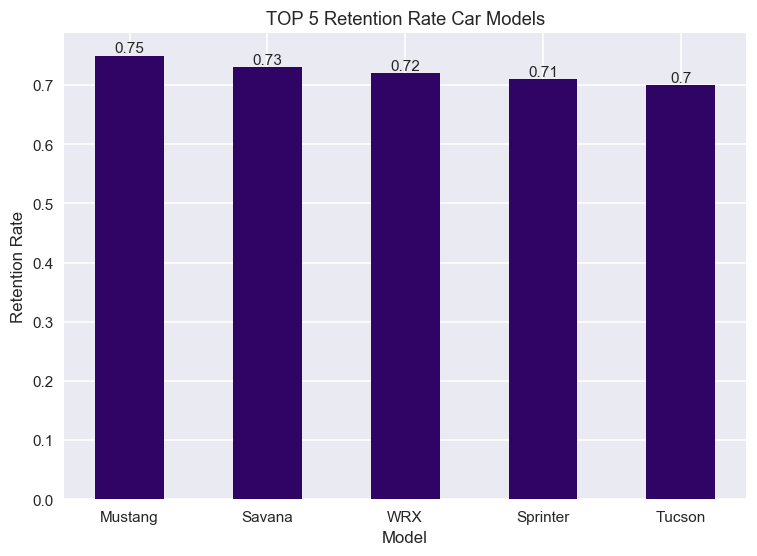

In [280]:
# TOP5 MODEL PLOT: model compare

x=TOP5_Model.index
y=TOP5_Model['ratention_rate']
plt.figure(dpi=110)
plt.bar(x,y,width=0.5,color='#300464')
plt.xlabel('Model')
plt.ylabel('Retention Rate')
plt.title('TOP 5 Retention Rate Car Models')

for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')
plt.show()

In [281]:
# fig=go.Figure(go.Bar(x=retentionrate_TOP5.index,y=retentionrate_TOP5['ratention_rate'],width=0.3,text=y,textposition='outside'\
#                 ))
fig=px.bar(TOP5_Model, x=TOP5_Model.index,y=TOP5_Model['ratention_rate'],text=y,\
          width=800,title='Top5 Model with high Retention Rate')
# fig.update_layout(title_text='Top5 Brands with high Retention Rate')

# py.iplot([top5brand])
fig.show()

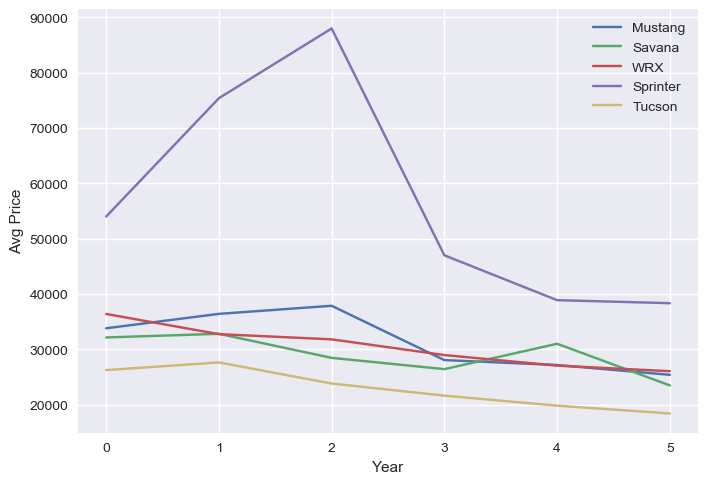

In [282]:
# TOP5 MODEL PLOT: price trend
plt.figure(dpi=100)

Mustang=TOP5_Model.loc['Mustang','0':'5']
plt.plot(Mustang,label='Mustang')

Savana=TOP5_Model.loc['Savana','0':'5']
plt.plot(Savana,label='Savana')

WRX=TOP5_Model.loc['WRX','0':'5']
plt.plot(WRX, label='WRX')

Sprinter=TOP5_Model.loc['Sprinter','0':'5']
plt.plot(Sprinter,label='Sprinter')

Tucson=TOP5_Model.loc['Tucson','0':'5']
plt.plot(Tucson,label='Tucson')

plt.xlabel('Year')
plt.ylabel('Avg Price')

plt.legend()
plt.show()

In [283]:
# BOTTOM5 MODEL PLOT
Bottom5_Model

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
Challenger,112800.0,46925.722222,42220.214286,45613.500000,32489.000000,28689.000000,0.254335
E-Class,96917.5,54998.000000,66236.571429,44113.600000,37051.600000,30095.666667,0.310529
F-150,95043.5,48130.470588,39895.400000,37163.775000,39046.620690,31607.459459,0.332558
Grand,51762.0,33704.420000,31182.715686,25132.213483,21498.514706,20547.680556,0.396965
Ridgeline,53029.5,41500.000000,37796.375000,35639.000000,33900.000000,21144.000000,0.398721


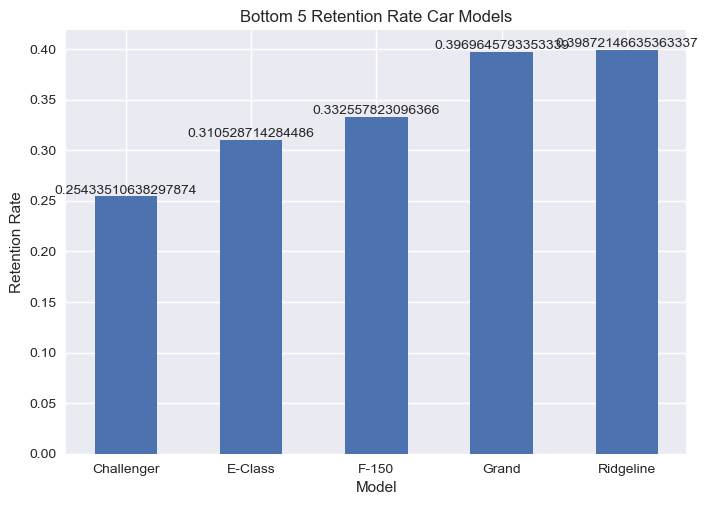

In [284]:
# BOTTOM5 MODEL PLOT: model compare
x=Bottom5_Model.index
y=Bottom5_Model['ratention_rate']
plt.figure(dpi=100)
plt.bar(x,y,width=0.5)
plt.xlabel('Model')
plt.ylabel('Retention Rate')
plt.title('Bottom 5 Retention Rate Car Models')
for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')

plt.show()

In [285]:
# fig=go.Figure(go.Bar(x=retentionrate_TOP5.index,y=retentionrate_TOP5['ratention_rate'],width=0.3,text=y,textposition='outside'\
#                 ))
fig=px.bar(Bottom5_Model, x=Bottom5_Model.index,y=Bottom5_Model['ratention_rate'],text=y,\
          width=800,title='Bottom5 Model with low Retention Rate')
# fig.update_layout(title_text='Bottom 5 Brands with high Retention Rate')

# py.iplot([top5brand])
fig.show()

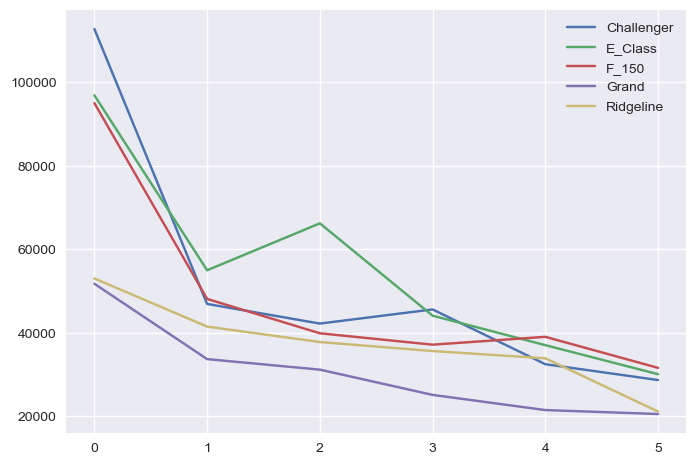

In [286]:
# BOTTOM5 MODEL PLOT: model price trend

plt.figure(dpi=100)
Challenger=Bottom5_Model.iloc[0,0:6]
plt.plot(Challenger,label='Challenger')

E_Class=Bottom5_Model.iloc[1,0:6]
plt.plot(E_Class,label='E_Class')

F_150=Bottom5_Model.iloc[2,0:6]
plt.plot(F_150,label='F_150')

Grand=Bottom5_Model.iloc[3,0:6]
plt.plot(Grand,label='Grand')

Ridgeline=Bottom5_Model.iloc[4,0:6]
plt.plot(Ridgeline,label='Ridgeline')
plt.legend()
plt.show()

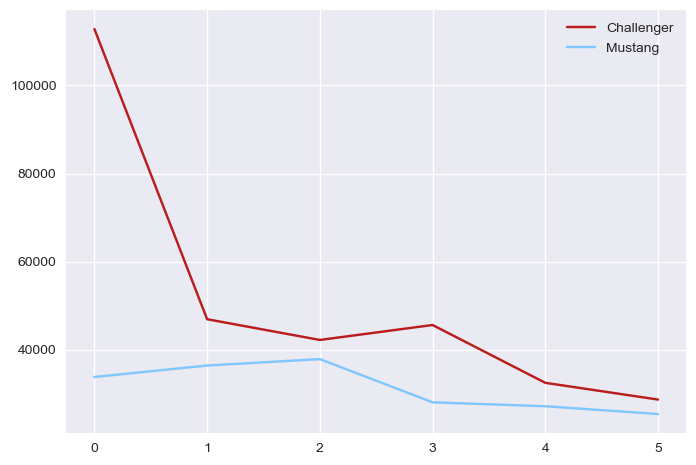

In [287]:
# TOP 1 AND BOTTOM 1 COMPARE
plt.figure(dpi=100)
Challenger=Bottom5_Model.iloc[0,0:6]
plt.plot(Challenger,label='Challenger',color='#BA1D1D')

Mustang=TOP5_Model.loc['Mustang','0':'5']
plt.plot(Mustang,label='Mustang',color='#80C7FF')
plt.legend()
plt.show()

<h1 align="center"><font size='6'>  Buy a Sedan </h1>
<br>

<h1 align="center"><font size='3'>  Check the Retention rate of different Brand, Body Type, Model with in 5 years </h1>
<br>

In [288]:
data_age_less5.head(2)

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel,country,real_year_age,car_age_int,car_age_str
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,-,-,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,3.75,4,4
1,2017,Dodge,Grand,Dodge,17885,57100,-,-,-,-,-,Automatic,-,-,-,-,USA,3.88,4,4


In [289]:
data_age_less5.shape

(13230, 20)

In [290]:
# filter rows only sedan
sedan_less5=data_age_less5[data_age_less5['body_type'].str.lower()=='sedan']
sedan_less5.shape

(4022, 20)

In [291]:
# group by country and find top 3 country
sedan_bycountry=sedan_less5.groupby(['country','car_age_str'])['price'].mean().unstack()
sedan_bycountry

car_age_str,0,1,2,3,4,5
country,,,,,,
Germany,62049.528302,47284.344086,38422.061856,33083.213675,29537.113514,23477.801020
Japan,29650.109756,24193.987952,21305.847584,19335.092949,18005.370180,16161.026810
Korea,21907.703704,19297.575758,18002.460317,15759.966887,14852.262774,14288.285714
Sweden,NaN,NaN,32843.000000,26384.000000,24939.000000,21275.000000
UK,NaN,26943.000000,22900.000000,NaN,NaN,14831.000000
USA,33556.285714,28032.577465,24300.000000,18269.816143,16326.569288,15207.164319


In [292]:
sedan_bycountry['ratention_rate']=sedan_bycountry['5']/sedan_bycountry['0']
sedan_bycountry

car_age_str,0,1,2,3,4,5,ratention_rate
country,,,,,,,
Germany,62049.528302,47284.344086,38422.061856,33083.213675,29537.113514,23477.801020,0.378372
Japan,29650.109756,24193.987952,21305.847584,19335.092949,18005.370180,16161.026810,0.545058
Korea,21907.703704,19297.575758,18002.460317,15759.966887,14852.262774,14288.285714,0.652204
Sweden,NaN,NaN,32843.000000,26384.000000,24939.000000,21275.000000,NaN
UK,NaN,26943.000000,22900.000000,NaN,NaN,14831.000000,NaN
USA,33556.285714,28032.577465,24300.000000,18269.816143,16326.569288,15207.164319,0.453184


In [293]:
sedan_bycountry_TOP3=sedan_bycountry.sort_values(by='ratention_rate',ascending=False).head(3)
sedan_bycountry_TOP3

car_age_str,0,1,2,3,4,5,ratention_rate
country,,,,,,,
Korea,21907.703704,19297.575758,18002.460317,15759.966887,14852.262774,14288.285714,0.652204
Japan,29650.109756,24193.987952,21305.847584,19335.092949,18005.370180,16161.026810,0.545058
USA,33556.285714,28032.577465,24300.000000,18269.816143,16326.569288,15207.164319,0.453184


In [294]:
sedan_bycountry_TOP3['ratention_rate']=sedan_bycountry_TOP3['ratention_rate'].round(2)

In [295]:
sedan_bycountry_TOP3

car_age_str,0,1,2,3,4,5,ratention_rate
country,,,,,,,
Korea,21907.703704,19297.575758,18002.460317,15759.966887,14852.262774,14288.285714,0.65
Japan,29650.109756,24193.987952,21305.847584,19335.092949,18005.370180,16161.026810,0.55
USA,33556.285714,28032.577465,24300.000000,18269.816143,16326.569288,15207.164319,0.45


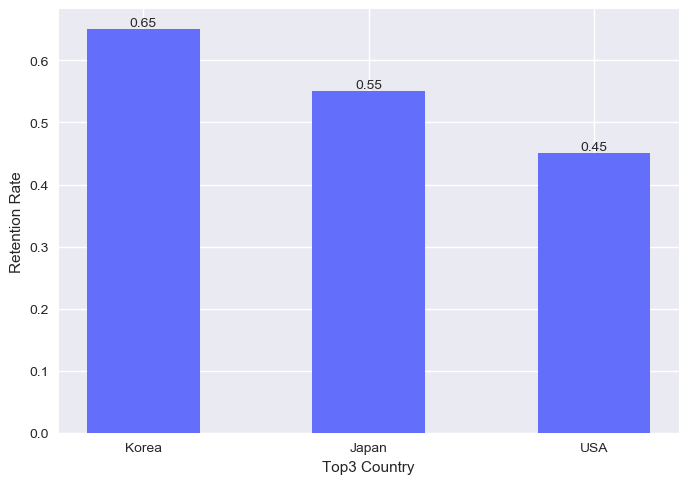

In [296]:
#plot of countries
x=sedan_bycountry_TOP3.index
y=sedan_bycountry_TOP3['ratention_rate']
plt.figure(dpi=100)
plt.bar(x,y,width=0.5,color='#636EFA')
plt.xlabel('Top3 Country',)
plt.ylabel('Retention Rate')

for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')
plt.show()

In [297]:
# filter top 5 brands in the 3 countries

sedan_3country=sedan_less5[sedan_less5['country'].isin(['Korea','Japan','USA'])]
sedan_3country

,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel,country,real_year_age,car_age_int,car_age_str
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,-,-,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,3.75,4,4
2,2017,Toyota,Camry,Toyota,22888,95532,Sedan,White,Gray,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,5.48,5,5
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,4.01,4,4
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,5,Automatic,FWD,2.0,4,Gasoline,Korea,0.49,0,0
9,2018,Acura,ILX,Aurora,25988,13054,Sedan,White,Black,4,5,Automatic,FWD,2.4,4,Gasoline,Japan,1.54,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,2018,Chrysler,300,Windsor,20995,54863,Sedan,Gray,Black,4,5,Automatic,RWD,3.6,6,Gasoline,USA,3.29,3,3
23927,2016,Buick,Verano,Windsor,14000,83424,Sedan,White,-,4,5,Automatic,FWD,2.4,4,Gasoline,USA,5.48,5,5
23930,2015,Buick,Verano,Windsor,15000,32525,Sedan,-,-,4,5,Automatic,FWD,2.4,4,Gasoline,USA,3.86,4,4
23934,2015,Kia,Rio,Windsor,13999,53815,Sedan,-,-,4,5,Automatic,FWD,1.6,4,Gasoline,Korea,4.74,5,5


In [298]:
sedan_3country_brands=sedan_3country.groupby(['brand','car_age_str'])['price'].mean().unstack()
sedan_3country_brands

car_age_str,0,1,2,3,4,5
brand,,,,,,
Acura,NaN,32423.000000,27380.500000,21258.315789,20041.365854,18540.323529
Buick,NaN,27964.333333,22505.000000,17614.333333,15945.357143,14998.000000
Cadillac,61328.000000,48290.666667,33548.285714,26915.727273,32453.909091,19176.266667
Chevrolet,28750.200000,20811.176471,18818.625000,16630.411348,14406.375796,13382.043478
Chrysler,NaN,29868.250000,28933.684211,25031.500000,18396.882353,16572.666667
Dodge,NaN,35435.750000,27696.788732,24927.222222,23141.500000,25404.000000
Ford,29815.000000,23558.347826,21891.230769,17322.488372,15741.222222,14334.729167
Honda,31549.950000,25345.219512,22236.145161,20219.716418,18496.892857,16030.970874
Hyundai,19847.800000,19573.776119,18177.800000,15701.119266,15214.455556,14678.569444


In [299]:
sedan_3country_brands['ratention_rate']=sedan_3country_brands['5']/sedan_3country_brands['0']
sedan_3country_brands

car_age_str,0,1,2,3,4,5,ratention_rate
brand,,,,,,,
Acura,NaN,32423.000000,27380.500000,21258.315789,20041.365854,18540.323529,NaN
Buick,NaN,27964.333333,22505.000000,17614.333333,15945.357143,14998.000000,NaN
Cadillac,61328.000000,48290.666667,33548.285714,26915.727273,32453.909091,19176.266667,0.312684
Chevrolet,28750.200000,20811.176471,18818.625000,16630.411348,14406.375796,13382.043478,0.465459
Chrysler,NaN,29868.250000,28933.684211,25031.500000,18396.882353,16572.666667,NaN
Dodge,NaN,35435.750000,27696.788732,24927.222222,23141.500000,25404.000000,NaN
Ford,29815.000000,23558.347826,21891.230769,17322.488372,15741.222222,14334.729167,0.480789
Honda,31549.950000,25345.219512,22236.145161,20219.716418,18496.892857,16030.970874,0.508114
Hyundai,19847.800000,19573.776119,18177.800000,15701.119266,15214.455556,14678.569444,0.739556


In [300]:
sedan_3country_brands_TOP5=sedan_3country_brands.sort_values(by='ratention_rate',ascending=False).head(5)
sedan_3country_brands_TOP5

car_age_str,0,1,2,3,4,5,ratention_rate
brand,,,,,,,
Hyundai,19847.800000,19573.776119,18177.800000,15701.119266,15214.455556,14678.569444,0.739556
Subaru,33604.333333,31683.916667,29234.400000,24955.956522,21774.148148,21578.545455,0.642136
Toyota,27896.604651,21846.000000,21415.758621,17938.583333,16408.754545,15946.658824,0.571634
Kia,24482.583333,18719.281250,17638.951220,15912.690476,14158.702128,13690.404255,0.559190
Lexus,52995.000000,NaN,37665.000000,33011.500000,33859.923077,28372.000000,0.535371


In [301]:
sedan_3country_brands_TOP5['ratention_rate']=sedan_3country_brands_TOP5['ratention_rate'].round(2)
sedan_3country_brands_TOP5

car_age_str,0,1,2,3,4,5,ratention_rate
brand,,,,,,,
Hyundai,19847.800000,19573.776119,18177.800000,15701.119266,15214.455556,14678.569444,0.74
Subaru,33604.333333,31683.916667,29234.400000,24955.956522,21774.148148,21578.545455,0.64
Toyota,27896.604651,21846.000000,21415.758621,17938.583333,16408.754545,15946.658824,0.57
Kia,24482.583333,18719.281250,17638.951220,15912.690476,14158.702128,13690.404255,0.56
Lexus,52995.000000,NaN,37665.000000,33011.500000,33859.923077,28372.000000,0.54


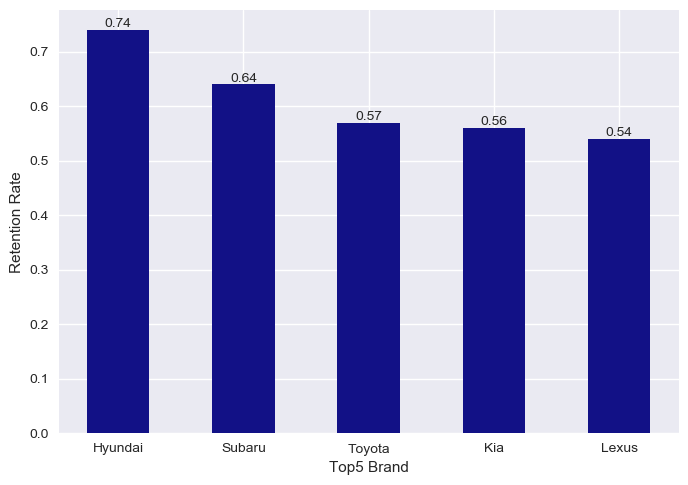

In [302]:
#plot of brand
x=sedan_3country_brands_TOP5.index
y=sedan_3country_brands_TOP5['ratention_rate']
plt.figure(dpi=100)
plt.bar(x,y,width=0.5,color='#121186')
plt.xlabel('Top5 Brand',)
plt.ylabel('Retention Rate')

for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')
plt.show()

In [303]:
# Filter model by the top 5 brand

sedan_model_in5brand=sedan_less5[data_age_less5['brand'].isin(['Hyundai','Lexus','Toyota','Subaru','Kia'])]
sedan_model_in5brand

/Users/Ericzheng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,year,brand,model,location,price,mileage,body_type,exterior_colour,interior_colour,door,passenger,transmission,drive_type,displacement,cylinder,fuel,country,real_year_age,car_age_int,car_age_str
0,2016,Toyota,Corolla,Aurora,13888,42098,Sedan,-,-,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,3.75,4,4
2,2017,Toyota,Camry,Toyota,22888,95532,Sedan,White,Gray,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,5.48,5,5
3,2016,Toyota,Camry,Aurora,19888,48315,Sedan,White,Black,4,5,Automatic,FWD,2.5,4,Gasoline,Japan,4.01,4,4
5,2020,Hyundai,Elantra,Aurora,17988,11719,Sedan,White,Black,4,5,Automatic,FWD,2.0,4,Gasoline,Korea,0.49,0,0
20,2015,Toyota,Corolla,Aurora,13500,29201,Sedan,Blue,Black,4,5,Automatic,FWD,1.8,4,Gasoline,Japan,3.72,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23728,2017,Toyota,Corolla,Windsor,17700,52820,Sedan,White,Black,4,5,-,FWD,1.8,4,Gasoline,Japan,3.70,4,4
23739,2016,Hyundai,Elantra,Windsor,15099,48838,Sedan,Gray,Black,4,5,Automatic,FWD,2.0,4,Gasoline,Korea,4.03,4,4
23784,2018,Kia,Forte,Windsor,14700,13675,Sedan,Black,Black,4,5,Automatic,FWD,2.0,4,Gasoline,Korea,1.57,2,2
23888,2018,Kia,Forte,Windsor,13995,25269,Sedan,Blue,Black,4,5,Automatic,FWD,2.0,4,Gasoline,Korea,2.05,2,2


In [304]:
sedan_model_meanprice=sedan_model_in5brand.groupby(['model','car_age_str'])['price'].mean().unstack()
sedan_model_meanprice

car_age_str,0,1,2,3,4,5
model,,,,,,
Accent,NaN,17986.000000,15490.000000,13359.833333,13066.666667,10995.000000
Avalon,NaN,NaN,34888.000000,NaN,24995.000000,NaN
Cadenza,NaN,NaN,NaN,NaN,NaN,23988.000000
Camry,35332.500000,27824.357143,23928.877193,24963.818182,21255.764706,18618.785714
Corolla,23755.307692,20214.441860,18541.267857,16348.291667,15367.321839,14661.085106
CorollaCertified,NaN,18900.000000,18495.000000,16995.000000,17109.666667,15293.250000
ES,52995.000000,NaN,37665.000000,32785.250000,30535.200000,28890.750000
Elantra,19479.928571,18844.846154,17036.180328,15381.070588,14374.153846,13432.428571
Equus,NaN,NaN,NaN,NaN,NaN,22995.000000


In [305]:
sedan_model_meanprice['ratention_rate']=sedan_model_meanprice['5']/sedan_model_meanprice['0']
sedan_model_meanprice

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
Accent,NaN,17986.000000,15490.000000,13359.833333,13066.666667,10995.000000,NaN
Avalon,NaN,NaN,34888.000000,NaN,24995.000000,NaN,NaN
Cadenza,NaN,NaN,NaN,NaN,NaN,23988.000000,NaN
Camry,35332.500000,27824.357143,23928.877193,24963.818182,21255.764706,18618.785714,0.526959
Corolla,23755.307692,20214.441860,18541.267857,16348.291667,15367.321839,14661.085106,0.617171
CorollaCertified,NaN,18900.000000,18495.000000,16995.000000,17109.666667,15293.250000,NaN
ES,52995.000000,NaN,37665.000000,32785.250000,30535.200000,28890.750000,0.545160
Elantra,19479.928571,18844.846154,17036.180328,15381.070588,14374.153846,13432.428571,0.689552
Equus,NaN,NaN,NaN,NaN,NaN,22995.000000,NaN


In [306]:
sedan_model_TOP5=sedan_model_meanprice.sort_values(by='ratention_rate',ascending=False).head(5)
sedan_model_TOP5

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
WRX,36399.000000,32752.166667,31814.285714,28972.818182,27062.100000,26062.500000,0.716022
Elantra,19479.928571,18844.846154,17036.180328,15381.070588,14374.153846,13432.428571,0.689552
Corolla,23755.307692,20214.441860,18541.267857,16348.291667,15367.321839,14661.085106,0.617171
Sonata,24998.000000,22394.642857,21587.545455,17463.176471,17990.045455,15424.960000,0.617048
Forte,20755.600000,17145.550000,16931.312500,14892.370370,13626.526316,12635.555556,0.608778


In [307]:
sedan_model_TOP5['ratention_rate']=sedan_model_TOP5['ratention_rate'].round(2)
sedan_model_TOP5

car_age_str,0,1,2,3,4,5,ratention_rate
model,,,,,,,
WRX,36399.000000,32752.166667,31814.285714,28972.818182,27062.100000,26062.500000,0.72
Elantra,19479.928571,18844.846154,17036.180328,15381.070588,14374.153846,13432.428571,0.69
Corolla,23755.307692,20214.441860,18541.267857,16348.291667,15367.321839,14661.085106,0.62
Sonata,24998.000000,22394.642857,21587.545455,17463.176471,17990.045455,15424.960000,0.62
Forte,20755.600000,17145.550000,16931.312500,14892.370370,13626.526316,12635.555556,0.61


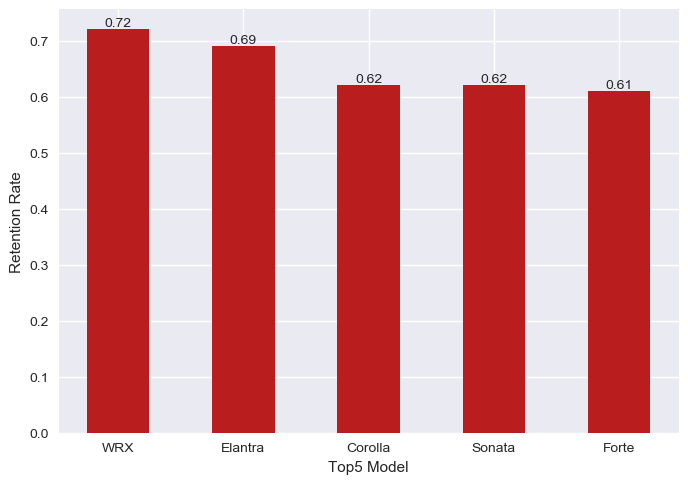

In [308]:
#plot of models
x=sedan_model_TOP5.index
y=sedan_model_TOP5['ratention_rate']
plt.figure(dpi=100)
plt.bar(x,y,width=0.5,color='#BA1D1D')
plt.xlabel('Top5 Model',)
plt.ylabel('Retention Rate')

for a,b in zip(x, y):
    plt.text(a, b, str(b),verticalalignment="bottom",horizontalalignment='center')
plt.show()